# COVID-19 Infection Prediction Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Step 1: Load Data

In [2]:
df = pd.read_csv('covid_balanced_500.csv')
df.head()

,age,sex,body_temperature,cough,sore_throat,shortness_of_breath,fatigue,vaccination_status,travel_history,chronic_conditions,loss_of_smell,oxygen_saturation,covid_test_result
0,68,Male,97.4,1,1,0,0,Partially,0,0,0,97.4,0
1,71,Male,98.2,1,1,1,1,Fully,0,0,0,85.5,1
2,35,Male,98.8,0,1,0,0,Fully,1,1,0,96.1,0
3,40,Other,98.0,1,1,0,1,Partially,0,0,1,88.5,1
4,40,Female,99.8,1,1,1,1,Fully,0,0,0,92.6,1


## Step 2: EDA

Text(0.5, 1.0, 'Body Temp vs COVID Result')

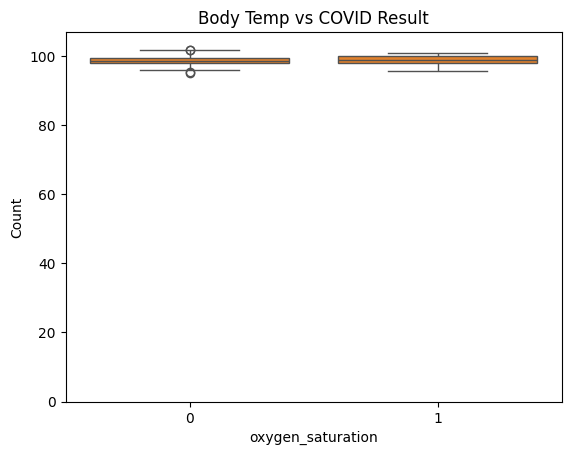

In [3]:
sns.histplot(df['oxygen_saturation'], bins=10)
plt.title('Oxygen Saturation Distribution')

sns.boxplot(x='covid_test_result', y='body_temperature', data=df)
plt.title('Body Temp vs COVID Result')

## Step 3: Preprocessing

In [4]:
data = df.copy()
label_encoders = {}
for col in ['sex', 'vaccination_status', 'covid_test_result']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print(data.head())

X = data.drop('covid_test_result', axis=1)
y = data['covid_test_result']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   age  sex  body_temperature  cough  sore_throat  shortness_of_breath  \
0   68    1              97.4      1            1                    0   
1   71    1              98.2      1            1                    1   
2   35    1              98.8      0            1                    0   
3   40    2              98.0      1            1                    0   
4   40    0              99.8      1            1                    1   

   fatigue  vaccination_status  travel_history  chronic_conditions  \
0        0                   1               0                   0   
1        1                   0               0                   0   
2        0                   0               1                   1   
3        1                   1               0                   0   
4        1                   0               0                   0   

   loss_of_smell  oxygen_saturation  covid_test_result  
0              0               97.4                  0  
1              0    

## Step 4: Model Training

In [5]:
model = RandomForestClassifier(class_weight='balanced', n_estimators= 500, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 5: Evaluation

In [6]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        93
           1       0.96      0.95      0.96        57

    accuracy                           0.97       150
   macro avg       0.97      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150

ROC-AUC Score: 0.994529334087908


In [7]:
df["covid_test_result"].value_counts()

covid_test_result
0    319
1    181
Name: count, dtype: int64